In [176]:
import nltk #importing nltk

In [8]:
nltk.download_shell() # downloading Stopwords from list

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [10]:
import pandas as pd #importing pandas and other importantant library like numpy and maplotlib

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
message = pd.read_excel("nlp.xlsx") # reading excel file

In [45]:
message.head() # Checking its head(first five rows)

,Unnamed: 0,Intoduction,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Acnesol Gel is an antibiotic that fights bacte...,NaN,NaN,NaN,NaN,NaN
1,NaN,Ambrodil Syrup is used for treating various re...,NaN,NaN,NaN,NaN,NaN
2,NaN,Augmentin 625 Duo Tablet is a penicillin-type ...,NaN,NaN,NaN,NaN,NaN
3,NaN,Azithral 500 Tablet is an antibiotic used to t...,NaN,NaN,NaN,NaN,NaN
4,NaN,Alkasol Oral Solution is a medicine used in th...,NaN,NaN,NaN,NaN,NaN


In [46]:
message.shape # checking the shape

(1000, 7)

In [47]:
msg = message.drop(["Unnamed: 0","Unnamed: 2", "Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6"],axis=1) # removing unncessary columns which have no importance and are empty

In [55]:
msg.head() # checking the head after removing unnessary cols.

,Intoduction
0,Acnesol Gel is an antibiotic that fights bacte...
1,Ambrodil Syrup is used for treating various re...
2,Augmentin 625 Duo Tablet is a penicillin-type ...
3,Azithral 500 Tablet is an antibiotic used to t...
4,Alkasol Oral Solution is a medicine used in th...


In [63]:
msg.describe() # using describe function to check the details. WE find out that there are 968 unique messages from overall count of 1000 and most commonly use is shown by the top keyword.

,Intoduction
count,1000
unique,968
top,Aquaviron Injection 1ml is a medicine used in ...
freq,2


In [67]:
msg["length"] = msg["Intoduction"].apply(len) # finding out the length of each message and making it as one of the column(feature engineering)
msg.head()

,Intoduction,length
0,Acnesol Gel is an antibiotic that fights bacte...,1361
1,Ambrodil Syrup is used for treating various re...,1149
2,Augmentin 625 Duo Tablet is a penicillin-type ...,1431
3,Azithral 500 Tablet is an antibiotic used to t...,1274
4,Alkasol Oral Solution is a medicine used in th...,1112


In [69]:
import seaborn as sns # importing seaborn library for better visulizations.

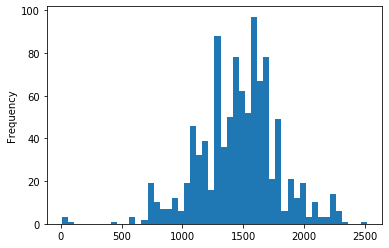

In [71]:
msg['length'].plot(bins=50, kind='hist') # plotting length of each message

In [74]:
msg.length.describe() # maximum length is of 2516 and minimum is of 12(data manupulation)

count    1000.000000
mean     1463.514000
std       329.599733
min        12.000000
25%      1272.000000
50%      1482.000000
75%      1662.000000
max      2516.000000
Name: length, dtype: float64

In [80]:
msg[msg['length'] == 2516]['Intoduction'].iloc[0] 

'Antidep 25mg Tablet is known as a tricyclic antidepressant. It is used to treat depression and bedwetting in children of age 6 years and above. It is also effective in treating depression that is unresponsive to other treatments. Antidep 25mg Tablet works by increasing the levels of chemical messengers in the brain that stabilizes and enhances the mood. It is better to take it before bedtime because it can make you feel drowsy. It can be taken with or without food, but you should take it at a fixed time each day for better efficacy. The dose and duration will be decided by your doctor so that you get the right amount to control your symptoms. If you have missed any dose, take it as soon as you remember it. Do not skip any dose and finish the full course of treatment even if you feel better. This medication must not be stopped suddenly without talking to the doctor. Your dose may be modified or gradually decreased before stopping the medication.The most common side effects of this medi

### First removing punctuation. We can just take advantage of Python's built-in string library to get a quick list of all the possible punctuation and then we will remove stopwords. We can import a list of english stopwords from NLTK. Stopwords are not relevantwords in the text. Hence we can remove the puntuations and stopwords to summarize our text with important words only.  




In [85]:
import string #importing strings
from nltk.corpus import stopwords #importing stopwords 

### Let's create a function that will process the string in the Intoduction column, then we can just use apply() in pandas do process all the text in the DataFrame.

In [173]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

### Now let's "tokenize" these Intoductions. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens

In [174]:
newmsg=pd.DataFrame(msg['Intoduction'].apply(text_process))

In [111]:
msg.head() #actual dataframe 

,Intoduction,length
0,Acnesol Gel is an antibiotic that fights bacte...,1361
1,Ambrodil Syrup is used for treating various re...,1149
2,Augmentin 625 Duo Tablet is a penicillin-type ...,1431
3,Azithral 500 Tablet is an antibiotic used to t...,1274
4,Alkasol Oral Solution is a medicine used in th...,1112


In [118]:
newmsg.iloc[0] # first row after text prerocessing.

Intoduction    [Acnesol, Gel, antibiotic, fights, bacteria, u...
Name: 0, dtype: object

In [119]:
newmsg["length"] = newmsg["Intoduction"].apply(len) # to check the length of each message after text-preprocessing


In [175]:
newmsg.head()# checking the head of the newmessage after the preprocessing

,Intoduction
0,"[Acnesol, Gel, antibiotic, fights, bacteria, u..."
1,"[Ambrodil, Syrup, used, treating, various, res..."
2,"[Augmentin, 625, Duo, Tablet, penicillintype, ..."
3,"[Azithral, 500, Tablet, antibiotic, used, trea..."
4,"[Alkasol, Oral, Solution, medicine, used, trea..."


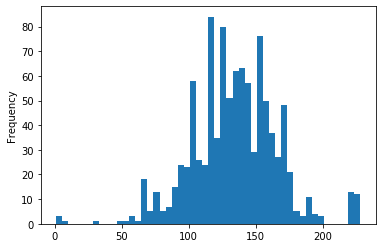

In [123]:
newmsg['length'].plot(bins=50, kind='hist') #plotting the length of new messages

In [126]:
newmsg['length'].describe() #maximum length is 228 now and minimum length is 1 now

count    1000.000000
mean      134.122000
std        31.809448
min         1.000000
25%       116.000000
50%       134.000000
75%       155.000000
max       228.000000
Name: length, dtype: float64

#### Here we are printing all the messages after text preprocessing and appending all the messages one by one so that we can store all the messages in a list and then can export them to the excel-file

In [197]:
l = []
for i in range(0,1000):
    x = newmsg["Intoduction"][i]
    y = " ".join(x)
    print(i,"->",y,end="\n")
    l.append(y)

0 -> Acnesol Gel antibiotic fights bacteria used treat acne appears spots pimples face chest back medicine works attacking bacteria cause pimplesAcnesol Gel meant external use used advised doctor normally wash dry affected area applying thin layer medicine applied broken damaged skin Avoid contact eyes nose mouth Rinse water accidentally get areas may take several weeks symptoms improve keep using medicine regularly stop using soon acne starts get better Ask doctor stop treatmentCommon side effects like minor itching burning redness skin oily skin may seen people usually temporary resolve Consult doctor bother go awayIt safe medicine inform doctor problems bowels intestines Also inform doctor ever bloody diarrhea caused taking antibiotics using medicines treat skin conditions Consult doctor using medicine pregnant breastfeeding
1 -> Ambrodil Syrup used treating various respiratory tract disorders associated excessive mucus works thinning loosens mucus nose windpipe lungs make easier co

390 -> AlerfixM Tablet combination medicine used treatment allergic symptoms runny nose stuffy nose sneezing itching swelling watery eyes congestion stuffiness also reduces inflammation airways make breathing easierAlerfixM Tablet taken without food dose duration advised doctor dose given depend condition respond medicine keep taking medicine long doctor recommends stop treatment early symptoms may come back condition may worsen Let healthcare team know medications taking may affect affected medicineThe common side effects nausea diarrhea vomiting dryness mouth headache skin rash flulike symptoms fatigue temporary usually resolve time Contact doctor straight away concerned side effects medicine may cause dizziness sleepiness drive anything requires mental focus know medicine affects Avoid drinking alcohol taking medicine worsen sleepinessNever support selfmedication recommend medicine another person beneficial plenty fluids taking medication start taking medicine important inform docto

797 -> Alfugress Tablet PR alpha adrenergic antagonist used treatment benign prostatic hyperplasia helps relieve symptoms like difficulty passing urine However decrease size prostateAlfugress Tablet PR advised take dose duration per prescription taken food take time regularly Swallow medicine whole without crushing chewing stop taking medicine without consulting doctor may lead worsening symptoms course treatment completed better efficacy medicineSome common side effects medicine upper respiratory tract infection headache tiredness may also lead blurry vision dizziness advised avoid driving medication side effects persist bother must consult doctor without delaySimple lifestyle changes help manage symptoms better Try urinate soon feel urge however never strain push empty bladder avoid drinking caffeinated alcoholic drinks night hours going bed going outBefore receiving treatment inform doctor medication health condition pregnant breastfeeding tell doctor prior treatment undergo eye sur

### Making another dataframe to store the list in continuous manner.

In [207]:
m = pd.DataFrame(data=l,columns = ["Intoduction"])

In [211]:
m # printing the dataframe.


,Intoduction
0,Acnesol Gel antibiotic fights bacteria used tr...
1,Ambrodil Syrup used treating various respirato...
2,Augmentin 625 Duo Tablet penicillintype antibi...
3,Azithral 500 Tablet antibiotic used treat vari...
4,Alkasol Oral Solution medicine used treatment ...
...,...
995,Azapure Tablet belongs group medicines called ...
996,Arimidex 1mg Tablet used alone treatments surg...
997,Arpimune 100mg Capsule used prevent body rejec...
998,Amlodac CH Tablet combination medicine used tr...


#### Exporting the entire dataframe back to excel file or excel workbook at the location we have specified and this excel file is the file we wanted. This is the text summariser that takes these descriptionsas input and summarises them into shorter versions without loosing the context.

In [213]:
m.to_excel (r'C:\Users\user\Desktop\export_dataframe.xlsx', index = False, header=True) 